In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./predictive_maintenance.csv')

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
print(data.shape)

(10000, 10)


In [4]:
X =data [['Torque [Nm]','Tool wear [min]']].values

y = data['Target'].values

print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X = X_train
y = y_train

print(X.shape)
print(y.shape)


(8000, 2)
(8000,)


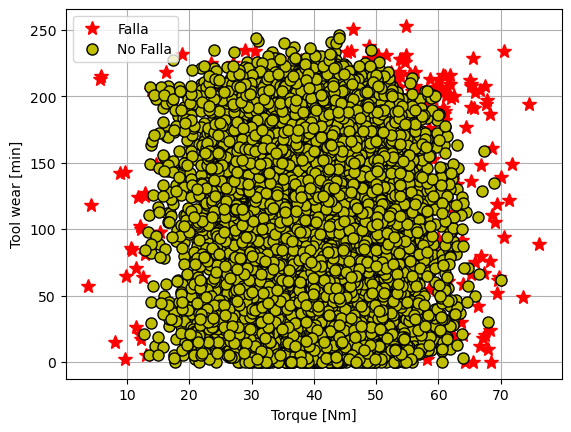

In [7]:


def plotData(X, y):
    # Crear figura
    fig = pyplot.figure()

    # Índices de fallas y no fallas
    pos = y == 1   # Falla
    neg = y == 0   # No Falla

    # Dibujar ejemplos
    pyplot.plot(X[pos, 0], X[pos, 1], 'r*', lw=2, ms=10, label='Falla')
    pyplot.plot(X[neg, 0], X[neg, 1], 'bo', mfc='y', ms=8, mec='k', mew=1, label='No Falla')

    # Etiquetas
    pyplot.xlabel('Torque [Nm]')
    pyplot.ylabel('Tool wear [min]')
    pyplot.legend()
    pyplot.grid(True)
    pyplot.show()




# Llamar a la función
plotData(X, y)


In [8]:
def sigmoid(z):
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [9]:

z = [0, 0.5, 0.75, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 0.75, 1] ) =  [0.5        0.62245933 0.6791787  0.73105858]


In [10]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar
    
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [11]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

In [12]:
print(X_norm)

[[-0.89269644  1.37503539]
 [ 1.38218727  0.45762016]
 [-0.89269644  1.35921788]
 ...
 [ 0.72076734  1.81792549]
 [-0.74237372 -1.18740025]
 [-1.42383669 -1.15576524]]


In [13]:

m, n = X.shape

print(f"m (número de filas): {m}")
print(f"n (número de columnas): {n}")

X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


m (número de filas): 8000
n (número de columnas): 2


In [14]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [15]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [-3.22637789  0.61906243  0.35143941]


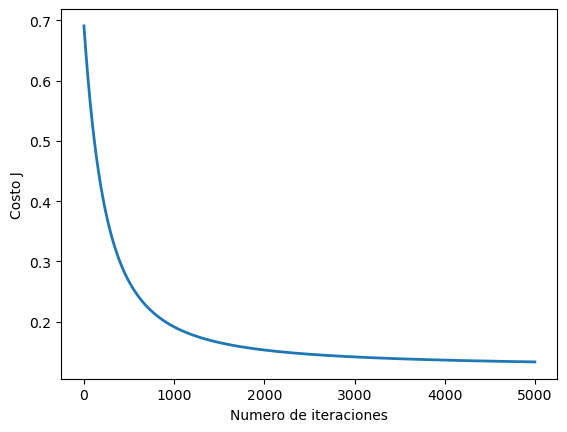

In [16]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [17]:
print(X_test)
print(theta)

[[ 36.1 198. ]
 [ 44.8 101. ]
 [ 42.  117. ]
 ...
 [ 56.5   7. ]
 [  9.3  18. ]
 [ 55.    9. ]]
[-3.22637789  0.61906243  0.35143941]


TEST de validación

In [18]:
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

X_test_norm

array([[-0.39162073,  1.4224879 ],
       [ 0.480251  , -0.11180998],
       [ 0.1996486 ,  0.14127008],
       ...,
       [ 1.65276816, -1.59865535],
       [-3.07738652, -1.4246628 ],
       [ 1.50244544, -1.56702034]])

In [19]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)
print(X_test_ready)

[[ 1.         -0.39162073  1.4224879 ]
 [ 1.          0.480251   -0.11180998]
 [ 1.          0.1996486   0.14127008]
 ...
 [ 1.          1.65276816 -1.59865535]
 [ 1.         -3.07738652 -1.4246628 ]
 [ 1.          1.50244544 -1.56702034]]


In [20]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

#------------------------------------------------------------------

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

In [21]:
# Convertimos los datos de prediccion a un Dataframe
df_pred = pd.DataFrame(y_predicha*100, columns = ['Probabilidad de victoria %'])
df_pred['Probabilidad de victoria %'] = df_pred['Probabilidad de victoria %'].abs()

In [22]:

pd.set_option('display.max_columns', None)

In [23]:
X_columans = [['Torque [Nm]','Tool wear [min]']]
X_test = np.array(X_test)
X_test = pd.DataFrame(X_test, columns = X_columans)

y_test = np.array(y_test)
y_test = pd.DataFrame(y_test, columns = ['Valores del Y Reales'])

# Para mostrar una tabla donde se muestren todos los resultados en uno solo de X_test_ready, y_test y y_predicha
# Mostramos los resultados en una sola tabla
df_resultado = pd.concat([ y_test, df_pred, X_test], axis = 1)
df_resultado.head(50)

,Valores del Y Reales,Probabilidad de victoria %,"(Torque [Nm],)","(Tool wear [min],)"
0,0,4.885094,36.1,198.0
1,1,4.887558,44.8,101.0
2,0,4.508232,42.0,117.0
3,0,1.566360,33.7,14.0
4,0,1.615336,23.9,129.0
5,1,9.160411,45.9,210.0
6,0,11.133090,51.1,191.0
7,0,9.586958,51.1,161.0
8,0,2.256056,36.2,53.0
9,0,2.025057,34.6,51.0


In [24]:
y_umbral = (y_predicha >= 0.5).astype(int)

In [25]:
print("Precisión de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test.values.ravel()) * 100))


Precisión de entrenamiento: 96.95 % 
